In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
fire_df= pd.read_csv('/content/sample_data/2023총합데이터.csv')
fire_df

,wrinvstg_no,fire_type_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,...,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,firefighters_count,population_per_firefighter,total_vehicles,nearest_fire_station_distance_km
0,조사서번호,화재유형명,건물구조식,건물구조조,건물구조즙,건물구조동수,지상층수,지하층수,연면적,바닥면적,...,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량,시간단위가시거리,소방공무원 (명),소방공무원1인당담당인구 (명),담당소방서가 보유한 소방장치 수의 합,소방전까지의 거리
1,2.30E+14,건축/구조물,기타 식,컨테이너조,컨테이너,1,1,0,0,0,...,NaN,3,160,17,NaN,2000,277,435,18,0.07570468
2,2.31E+14,건축/구조물,양식(옥),철근콘크리트조,슬라브가,2,4,1,4774.1,1458.6,...,NaN,1,90,88,NaN,1636,306,1292,18,0.003518723
3,2.30E+14,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1,7,1,10729.28,1982.69,...,NaN,5,290,29,NaN,2000,317,1795,19,0.029341713
4,2.31E+14,건축/구조물,양식(옥),철근콘크리트조,슬라브가,NaN,3,1,354.21,100.52,...,NaN,3,270,55,NaN,2000,318,1271,18,0.004709038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,2.30E+14,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1,1,NaN,71.14,71.14,...,NaN,3,250,29,NaN,3597,243,1261,14,0.016656399
3528,2.30E+14,건축/구조물,조립식,컨테이너조,컨테이너,1,2,0,36,18,...,3.7,5,70,100,NaN,1028,277,1819,16,0.21341125
3529,2.31E+14,건축/구조물,양식(옥),목조,슬라브가,1,1,1,26.45,26.45,...,NaN,3,70,71,NaN,2000,298,474,20,0.015505223
3530,2.30E+14,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1,1,NaN,25,25,...,NaN,2,360,58,NaN,2000,298,474,20,0.108342435


In [3]:
# 범주형 변수 원-핫 인코딩
buld_srtfrm_encoded = pd.get_dummies(fire_df['buld_srtfrm'], prefix='buld_srtfrm')
buld_strctr_encoded = pd.get_dummies(fire_df['buld_strctr'], prefix='buld_strctr')



# 기존 X에 인코딩된 범주형 변수 추가
X = fire_df[['ign_floor_nm', 'nearest_fire_station_distance_km','spt_frstt_dist','time_unit','total_vehicles','time_unit_humidity','time_unit_ws','population_per_firefighter']]

# nearest_fire_station_distance_km 열의 데이터 타입을 수치형으로 변환
X['nearest_fire_station_distance_km'] = pd.to_numeric(X['nearest_fire_station_distance_km'], errors='coerce')
X['ign_floor_nm'] = pd.to_numeric(X['ign_floor_nm'], errors='coerce')

# 원-핫 인코딩된 'buld_srtfrm' 변수를 기존 X에 추가
X = pd.concat([X, buld_srtfrm_encoded,buld_strctr_encoded], axis=1)

# 결측치 제거
X.dropna(inplace=True)

# 목표 변수 정의
y = fire_df['fire_supesn_time_label']

# y에서도 결측치 제거 (X와 동일한 인덱스 사용)
y = y[X.index]

# 데이터셋을 학습용(train)과 테스트용(test)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

# Decision Tree Classifier 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=111)
dt_clf.fit(X_train, y_train)

# 예측
test_pred = dt_clf.predict(X_test)


<ipython-input-3-9062351d190d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['nearest_fire_station_distance_km'] = pd.to_numeric(X['nearest_fire_station_distance_km'], errors='coerce')
<ipython-input-3-9062351d190d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ign_floor_nm'] = pd.to_numeric(X['ign_floor_nm'], errors='coerce')


In [4]:
dt_clf=DecisionTreeClassifier(random_state=111)
dt_clf.fit(X_train, y_train)

train_pred = dt_clf.predict(X_train)
test_pred =dt_clf.predict(X_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

1.0
0.6625592417061611


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

skf_data = StratifiedKFold(n_splits=5)
n_iter = 0

skf_cv_acc_train = []
skf_cv_acc_test = []
class_accuracies = {1: [], 2: [], 3: [], 4: []}  # 클래스별 정확도 저장용

skf_ml = DecisionTreeClassifier(random_state=111)

# SMOTE 적용
smote = SMOTE(random_state=111)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 가정: X_resampled와 y_resampled는 이미 SMOTE로 처리된 데이터입니다.

# StratifiedKFold 설정
skf_data = StratifiedKFold(n_splits=5)
n_iter = 0

skf_cv_acc_train = []
skf_cv_acc_test = []
class_accuracies = {1: [], 2: [], 3: [], 4: []}  # 클래스별 정확도 저장용

# 모델 설정
skf_ml = DecisionTreeClassifier(random_state=111)

# 예측에서 reject할 임계값 설정 (예: 0.5 이하의 확률은 거부)
reject_threshold = 0.7

for train_idx, test_idx in skf_data.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    # 학습
    skf_ml.fit(X_train, y_train)

    # 예측 확률 계산
    skf_pred_prob = skf_ml.predict_proba(X_test)

    # 예측 확률에 따라 가장 높은 확률을 가진 클래스를 선택, 임계값 이하인 경우 "reject"로 처리
    skf_pred_test = []
    for prob in skf_pred_prob:
        if max(prob) < reject_threshold:
            skf_pred_test.append(-1)  # reject는 -1로 처리 (숫자로)
        else:
            skf_pred_test.append(np.argmax(prob) + 1)  # 가장 높은 확률을 가진 클래스 선택

    # reject (-1)을 제외한 라벨만 남겨둠
    non_reject_idx = [i for i, pred in enumerate(skf_pred_test) if pred != -1]

    if non_reject_idx:  # reject가 아닌 경우에만 처리
        y_test_filtered = y_test.iloc[non_reject_idx]
        skf_pred_filtered = [skf_pred_test[i] for i in non_reject_idx]

        # 여기에서 모든 데이터가 숫자인지 확인 (string이 없는지 체크)
        y_test_filtered = y_test_filtered.astype(int)
        skf_pred_filtered = np.array(skf_pred_filtered).astype(int)

        # classification_report에 숫자 라벨만 전달
        report = classification_report(y_test_filtered, skf_pred_filtered, output_dict=True)

        # 클래스별 정확도 계산 및 저장
        for class_label in report.keys():
            if class_label.isdigit():
                class_accuracy = np.round(report[class_label]['precision'], 4)
                class_accuracies[int(class_label)].append(class_accuracy)

        # 정확도 계산
        acc_test = accuracy_score(y_test_filtered, skf_pred_filtered)
        skf_cv_acc_test.append(acc_test)

        # 결과 출력
        print(f'{n_iter + 1} 번 test 교차 검증 정확도 (reject 제외): {acc_test}')

    else:
        print(f'{n_iter + 1} 번: 모든 예측이 reject되었습니다. 분석할 데이터가 없습니다.')

    n_iter += 1

# 클래스별 평균 정확도 출력
print("\n클래스별 평균 정확도 (reject 제외):")
for class_label, accuracies in class_accuracies.items():
    if accuracies:
        mean_accuracy = np.mean(accuracies)
        print(f'클래스 {class_label} 평균 정확도: {mean_accuracy}')


1 번 test 교차 검증 정확도 (reject 제외): 0.7369133574007221
2 번 test 교차 검증 정확도 (reject 제외): 0.8564981949458483
3 번 test 교차 검증 정확도 (reject 제외): 0.8759025270758123
4 번 test 교차 검증 정확도 (reject 제외): 0.8438628158844765
5 번 test 교차 검증 정확도 (reject 제외): 0.8619133574007221

클래스별 평균 정확도 (reject 제외):
클래스 1 평균 정확도: 0.81286
클래스 2 평균 정확도: 0.70404
클래스 3 평균 정확도: 0.8912199999999999
클래스 4 평균 정확도: 0.9636000000000001


In [6]:
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import numpy as np


# StratifiedKFold를 사용하여 교차 검증 수행
skf_data = StratifiedKFold(n_splits=5)
n_iter = 0

skf_cv_acc_train = []
skf_cv_acc_test = []
class_accuracies = {1: [], 2: [], 3: [], 4: []}  # 클래스별 정확도 저장용

skf_ml = DecisionTreeClassifier(random_state=111)

# SMOTE 적용
smote = SMOTE(random_state=111)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 클래스별 데이터 개수 출력 (SMOTE 적용 후)
class_counts_resampled = y_resampled.value_counts()
print("\n각 클래스의 데이터 개수 (SMOTE 적용 후):")
print(class_counts_resampled)

for train_idx, test_idx in skf_data.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    # 학습
    skf_ml.fit(X_train, y_train)

    # 예측
    skf_pred_train = skf_ml.predict(X_train)
    skf_pred_test = skf_ml.predict(X_test)

    # 정확도 계산
    n_iter += 1
    acc_train = np.round(accuracy_score(y_train, skf_pred_train), 4)
    acc_test = np.round(accuracy_score(y_test, skf_pred_test), 4)

    # 교차 검증 결과 출력
    print(f'\n {n_iter} 번 train 교차 검증 정확도 : {acc_train}, test 교차 검증 정확도 : {acc_test}')

    # 클래스별 정확도 계산
    report = classification_report(y_test, skf_pred_test, output_dict=True)

    for class_label in report.keys():  # 실제 클래스 레이블에 대해 반복
        if class_label.isdigit():  # 클래스 레이블이 숫자인 경우에만 처리
            class_accuracy = np.round(report[class_label]['precision'], 4)
            class_accuracies[int(class_label)].append(class_accuracy)

    # 정확도 저장
    skf_cv_acc_train.append(acc_train)
    skf_cv_acc_test.append(acc_test)

# 평균 정확도 계산
train_acc_mean = np.mean(skf_cv_acc_train)
test_acc_mean = np.mean(skf_cv_acc_test)

print(f'\ntrain 평균 정확도: {train_acc_mean}')
print(f'test 평균 정확도: {test_acc_mean}')

# 클래스별 평균 정확도 출력
print("\n클래스별 평균 정확도:")
for class_label, accuracies in class_accuracies.items():
    if accuracies:  # 정확도 리스트가 비어 있지 않은 경우에만 평균 계산
        mean_accuracy = np.mean(accuracies)
        print(f'클래스 {class_label} 평균 정확도: {mean_accuracy}')



각 클래스의 데이터 개수 (SMOTE 적용 후):
fire_supesn_time_label
4    2770
3    2770
2    2770
1    2770
Name: count, dtype: int64

 1 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.7369

 2 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8565

 3 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8759

 4 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8439

 5 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8619

train 평균 정확도: 1.0
test 평균 정확도: 0.8350200000000001

클래스별 평균 정확도:
클래스 1 평균 정확도: 0.81286
클래스 2 평균 정확도: 0.70404
클래스 3 평균 정확도: 0.8912199999999999
클래스 4 평균 정확도: 0.9636000000000001


In [7]:
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import numpy as np


# StratifiedKFold를 사용하여 교차 검증 수행
skf_data = StratifiedKFold(n_splits=5)
n_iter = 0

skf_cv_acc_train = []
skf_cv_acc_test = []
class_accuracies = {1: [], 2: [], 3: [], 4: []}  # 클래스별 precision 저장용
class_recalls = {1: [], 2: [], 3: [], 4: []}  # 클래스별 recall 저장용
class_f1_scores = {1: [], 2: [], 3: [], 4: []}  # 클래스별 F1 저장용
class_accuracy_scores = {1: [], 2: [], 3: [], 4: []}  # 클래스별 accuracy 저장용
confusion_matrices = []  # 각 fold의 confusion matrix 저장용

skf_ml = DecisionTreeClassifier(random_state=111)

# SMOTE 적용
smote = SMOTE(random_state=111)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 클래스별 데이터 개수 출력 (SMOTE 적용 후)
class_counts_resampled = y_resampled.value_counts()
print("\n각 클래스의 데이터 개수 (SMOTE 적용 후):")
print(class_counts_resampled)

for train_idx, test_idx in skf_data.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    # 학습
    skf_ml.fit(X_train, y_train)

    # 예측
    skf_pred_train = skf_ml.predict(X_train)
    skf_pred_test = skf_ml.predict(X_test)

    # 정확도 계산
    n_iter += 1
    acc_train = np.round(accuracy_score(y_train, skf_pred_train), 4)
    acc_test = np.round(accuracy_score(y_test, skf_pred_test), 4)

    # 교차 검증 결과 출력
    print(f'\n {n_iter} 번 train 교차 검증 정확도 : {acc_train}, test 교차 검증 정확도 : {acc_test}')

    # confusion matrix 계산
    cm = confusion_matrix(y_test, skf_pred_test)
    confusion_matrices.append(cm)

    print(f"\n {n_iter} 번 혼동 행렬 (Confusion Matrix):")
    print(cm)

    # 클래스별 precision, recall, f1 계산
    report = classification_report(y_test, skf_pred_test, output_dict=True)

    # 혼동 행렬을 통해 클래스별 정확도 계산
    for i, label in enumerate([1, 2, 3, 4]):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        class_accuracy = np.round((TP + TN) / (TP + TN + FP + FN), 4)

        class_precision = np.round(report[str(label)]['precision'], 4)
        class_recall = np.round(report[str(label)]['recall'], 4)
        class_f1 = np.round(report[str(label)]['f1-score'], 4)

        class_accuracies[label].append(class_precision)
        class_recalls[label].append(class_recall)
        class_f1_scores[label].append(class_f1)
        class_accuracy_scores[label].append(class_accuracy)

    # 정확도 저장
    skf_cv_acc_train.append(acc_train)
    skf_cv_acc_test.append(acc_test)

# 평균 정확도 계산
train_acc_mean = np.mean(skf_cv_acc_train)
test_acc_mean = np.mean(skf_cv_acc_test)

print(f'\ntrain 평균 정확도: {train_acc_mean}')
print(f'test 평균 정확도: {test_acc_mean}')

# 클래스별 평균 precision, recall, f1-score, accuracy 출력
print("\n클래스별 평균 Precision, Recall, F1-score, Accuracy:")
for class_label in class_accuracies.keys():
    if class_accuracies[class_label]:  # 리스트가 비어 있지 않은 경우에만 평균 계산
        mean_precision = np.mean(class_accuracies[class_label])
        mean_recall = np.mean(class_recalls[class_label])
        mean_f1 = np.mean(class_f1_scores[class_label])
        mean_accuracy = np.mean(class_accuracy_scores[class_label])
        print(f'클래스 {class_label} 평균 Precision: {mean_precision}, 평균 Recall: {mean_recall}, 평균 F1-score: {mean_f1}, 평균 Accuracy: {mean_accuracy}')



각 클래스의 데이터 개수 (SMOTE 적용 후):
fire_supesn_time_label
4    2770
3    2770
2    2770
1    2770
Name: count, dtype: int64

 1 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.7369

 1 번 혼동 행렬 (Confusion Matrix):
[[452  78  18   6]
 [364 179  11   0]
 [ 42  36 473   3]
 [ 17   5   3 529]]

 2 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8565

 2 번 혼동 행렬 (Confusion Matrix):
[[388 137  20   9]
 [ 77 436  29  12]
 [  3  21 530   0]
 [  5   5   0 544]]

 3 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8759

 3 번 혼동 행렬 (Confusion Matrix):
[[405 123  22   4]
 [ 24 463  58   9]
 [  7  14 528   5]
 [  0   9   0 545]]

 4 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8439

 4 번 혼동 행렬 (Confusion Matrix):
[[365 160  22   7]
 [ 41 430  60  23]
 [  1  24 526   3]
 [  3   2   0 549]]

 5 번 train 교차 검증 정확도 : 1.0, test 교차 검증 정확도 : 0.8619

 5 번 혼동 행렬 (Confusion Matrix):
[[396 132  20   6]
 [ 30 459  51  14]
 [  5  29 518   2]
 [  5   6   6 537]]

train 평균 정확도: 1.0
test 평균 정확도: 0.8350200000000001

클래스별 평균 Precision, R

In [8]:
# 학습된 모델의 변수 중요도 추출
import pandas as pd

# 각 특성의 중요도를 DataFrame으로 변환
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,  # 학습에 사용된 특성 이름
    'Importance': dt_clf.feature_importances_  # 각 특성의 중요도
})

# 중요도 순으로 정렬
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# 중요도 출력
print(feature_importances_df)


                             Feature  Importance
1   nearest_fire_station_distance_km    0.209832
5                 time_unit_humidity    0.154838
3                          time_unit    0.131220
2                     spt_frstt_dist    0.125220
0                       ign_floor_nm    0.111119
7         population_per_firefighter    0.092839
6                       time_unit_ws    0.068045
4                     total_vehicles    0.044488
17                   buld_strctr_벽돌조    0.019719
10                 buld_srtfrm_양식(옥)    0.007954
18                   buld_strctr_블록조    0.006193
21                   buld_strctr_철골조    0.005929
16                    buld_strctr_목조    0.005805
23               buld_strctr_철근콘크리트조    0.005409
13                 buld_srtfrm_한식(옥)    0.004826
22             buld_strctr_철골철근콘크리트조    0.002990
20               buld_strctr_샌드위치패널조    0.001887
9                   buld_srtfrm_기타 식    0.001687
15                  buld_strctr_기타 조    0.000000
14                 b

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and direc

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

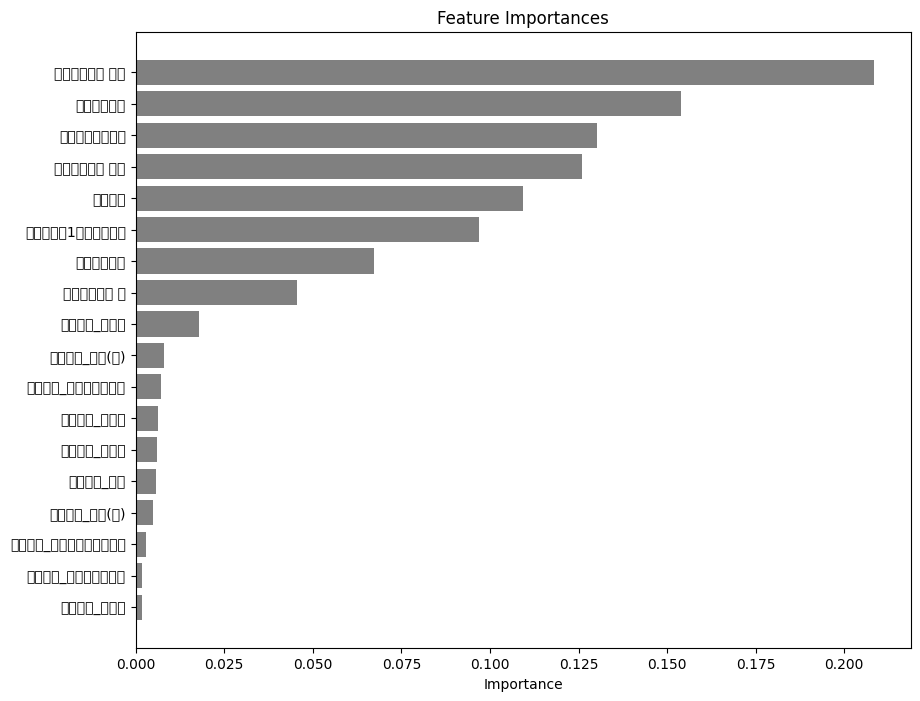

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 영어 변수명을 한글 변수명으로 변환
column_mapping = {
    'nearest_fire_station_distance_km': '소화전까지의 거리',
    'time_unit_humidity': '시간단위습도',
    'time_unit': '시간단위가시거리',
    'spt_frstt_dist': '소방서까지의 거리',
    'ign_floor_nm': '발화층수',
    'population_per_firefighter': '소방공무원1인당담당인구',
    'time_unit_ws': '시간단위풍속',
    'total_vehicles': '소방장치수의 합',
    'buld_strctr_벽돌조': '건물구조_벽돌조',
    'buld_srtfrm_양식(옥)': '건물구조_양식(옥)',
    'buld_strctr_철근콘크리트조': '건물구조_철근콘크리트조',
    'buld_strctr_블록조': '건물구조_블록조',
    'buld_strctr_철골조': '건물구조_철골조',
    'buld_strctr_목조': '건물구조_목조',
    'buld_srtfrm_한식(옥)': '건물구조_한식(옥)',
    'buld_strctr_철골철근콘크리트조': '건물구조_철골철근콘크리트조',
    'buld_strctr_샌드위치패널조': '건물구조_샌드위치패널조',
    'buld_srtfrm_기타 식': '건물구조_기타식'
}

# 가상의 중요도 데이터
features = [
    'nearest_fire_station_distance_km', 'time_unit_humidity', 'time_unit', 'spt_frstt_dist',
    'ign_floor_nm', 'population_per_firefighter', 'time_unit_ws', 'total_vehicles',
    'buld_strctr_벽돌조', 'buld_srtfrm_양식(옥)', 'buld_strctr_철근콘크리트조', 'buld_strctr_블록조',
    'buld_strctr_철골조', 'buld_strctr_목조', 'buld_srtfrm_한식(옥)', 'buld_strctr_철골철근콘크리트조',
    'buld_strctr_샌드위치패널조', 'buld_srtfrm_기타 식'
]

importances = [
    0.208306, 0.154053, 0.130295, 0.126054, 0.109270, 0.096781, 0.067194, 0.045649,
    0.017919, 0.007954, 0.007209, 0.006193, 0.005929, 0.005805, 0.004826, 0.002990,
    0.001887, 0.001687
]

# 변수명을 한글로 변환
features_kor = [column_mapping.get(feature, feature) for feature in features]

# 한글 변수명을 사용해 DataFrame 생성
feature_importances_df_kor = pd.DataFrame({
    'Feature': features_kor,
    'Importance': importances
})

# 중요도 순으로 정렬
feature_importances_df_kor = feature_importances_df_kor.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df_kor['Feature'], feature_importances_df_kor['Importance'], color='gray')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # 가장 중요한 특성이 상단에 오도록 함
plt.show()


In [11]:
# 산점도를 통해 첫 번째 열(화재 진압 시간)과 두 번째 열(추가 값)의 상관관계를 시각화
plt.figure(figsize=(8,6))

# 산점도 그리기 (첫 번째 열: 화재진압시간, 두 번째 열: 추가값)
plt.scatter(df['화재진압시간'], df['추가값'], color='blue', alpha=0.6)

# 제목 및 라벨 설정
plt.title('화재 진압 시간과 추가 값의 산점도')
plt.xlabel('화재 진압 시간 (분)')
plt.ylabel('추가 값')
plt.grid(True)

# 그래프 표시
plt.show()

NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
!pip install matplotlib
!pip install seaborn
# 제목을 "종합 ROC 커브"로 영작하여 수정
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', linestyle='--', color='black', marker='o')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_decision_tree:.2f})', linestyle='-', color='darkgray', marker='s')
plt.plot(fpr_random_forest, tpr_random_forest, label=f'Random Forest (AUC = {auc_random_forest:.2f})', linestyle='-.', color='gray', marker='d')
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost (AUC = {auc_xgboost:.2f})', linestyle=':', color='lightgray', marker='^')

# 대각선 y=x
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# 그래프 설정
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comprehensive ROC Curve')
plt.legend(loc='lower right')

# 그래프 출력
plt.tight_layout()
plt.show()
